<a href="https://colab.research.google.com/github/Gul-Fatima/Data-Science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Importing Dataset**

In [2]:
test_cv = pd.read_csv('test.csv')
train_cv = pd.read_csv('train.csv')

In [3]:
train_cv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Exploration**

In [4]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_cv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Observations**
**Non Null values:**
* Name
* Sex
* Ticket
* Cabin
* Embarked


**Finding missing values:**

In [6]:
train_cv.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
train_cv['Survived'].value_counts(normalize=True)  # Survival rates
train_cv.groupby('Pclass')['Survived'].mean()      # Survival by class
train_cv.groupby('Sex')['Survived'].mean()         # Survival by gender


,Survived
Sex,
female,0.742038
male,0.188908


# Data Cleaning:

**Handling null values**

In [8]:
train_cv['Age'].fillna(train_cv['Age'].median(), inplace=True) #using mean bcz continuous
train_cv['Embarked'].fillna(train_cv['Embarked'].mode()[0], inplace=True) #using mode for discontinuous nan values

In [9]:
train_cv.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
#dropping column cabin bcz irrelevant
train_cv.drop(["Cabin"], axis ='columns',inplace=True)

In [11]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
train_cv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Handling Categorical values:**

In [13]:
train_cv = pd.get_dummies(train_cv, columns=['Sex', 'Embarked'], drop_first=False)

In [14]:
train_cv.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.00,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.00,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.45,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.00,False,True,True,False,False
890,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,False,True,False,True,False


In [15]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    bool   
 10  Sex_male     891 non-null    bool   
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(2)
memory usage: 67.1+ KB


In [16]:
# Convert True/False to 1/0 for multiple columns
columns_to_map = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

for column in columns_to_map:
    train_cv[column] = train_cv[column].map({True: 1, False: 0})


In [17]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  Embarked_C   891 non-null    int64  
 12  Embarked_Q   891 non-null    int64  
 13  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 97.6+ KB


In [18]:
#dropping column name bcz irrelevant
train_cv.drop(["Name"], axis ='columns',inplace=True)

In [19]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Sex_female   891 non-null    int64  
 9   Sex_male     891 non-null    int64  
 10  Embarked_C   891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 90.6+ KB


In [20]:
train_cv['FamilySize'] = train_cv['SibSp'] + train_cv['Parch']
train_cv['IsAlone'] = (train_cv['FamilySize'] == 0).astype(int)


In [21]:
train_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Sex_female   891 non-null    int64  
 9   Sex_male     891 non-null    int64  
 10  Embarked_C   891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
 13  FamilySize   891 non-null    int64  
 14  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 104.5+ KB


In [22]:
train_cv.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,1
3,4,1,1,35.0,1,0,113803,53.1000,1,0,0,0,1,1,0
4,5,0,3,35.0,0,0,373450,8.0500,0,1,0,0,1,0,1


In [23]:
train_cv.drop(["Ticket"], axis ='columns',inplace=True)

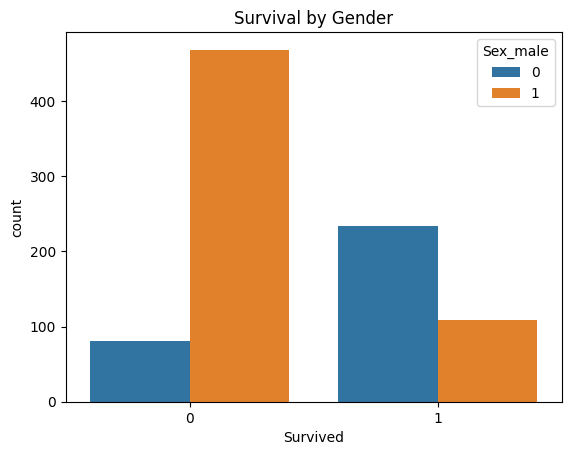

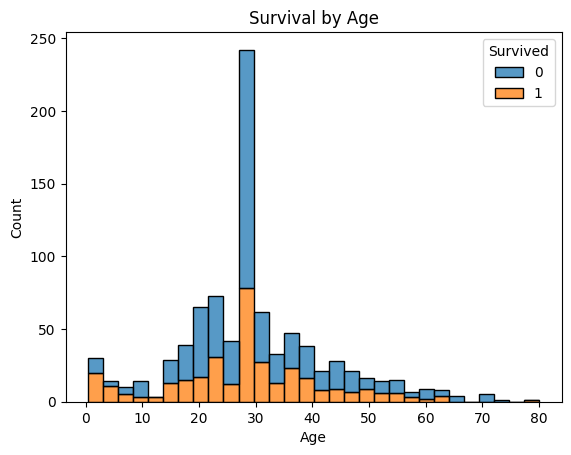

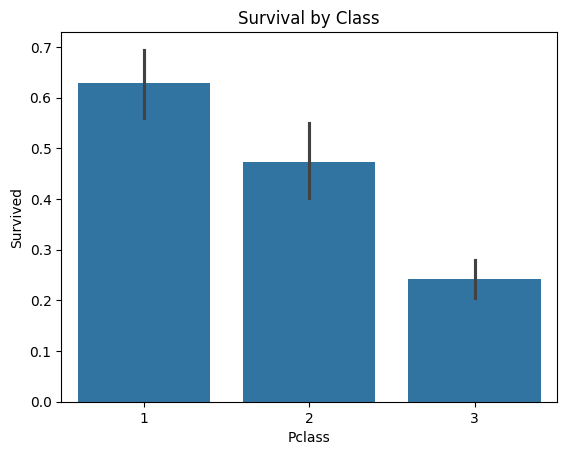

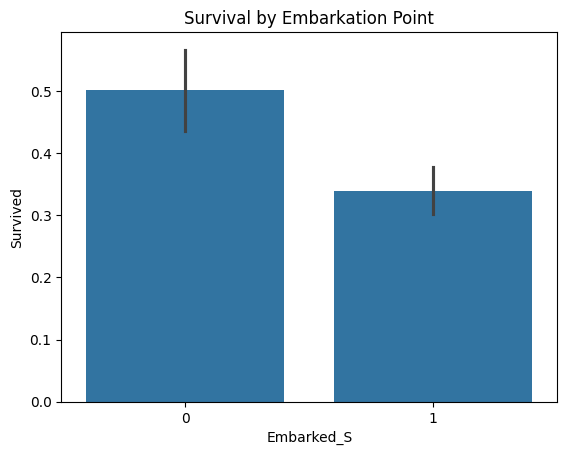

In [24]:
sns.countplot(x='Survived', hue='Sex_male', data=train_cv)
plt.title('Survival by Gender')
plt.show()

sns.histplot(data=train_cv, x='Age', hue='Survived', multiple='stack')
plt.title('Survival by Age')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_cv)
plt.title('Survival by Class')
plt.show()

sns.barplot(x='Embarked_S', y='Survived', data=train_cv)
plt.title('Survival by Embarkation Point')
plt.show()


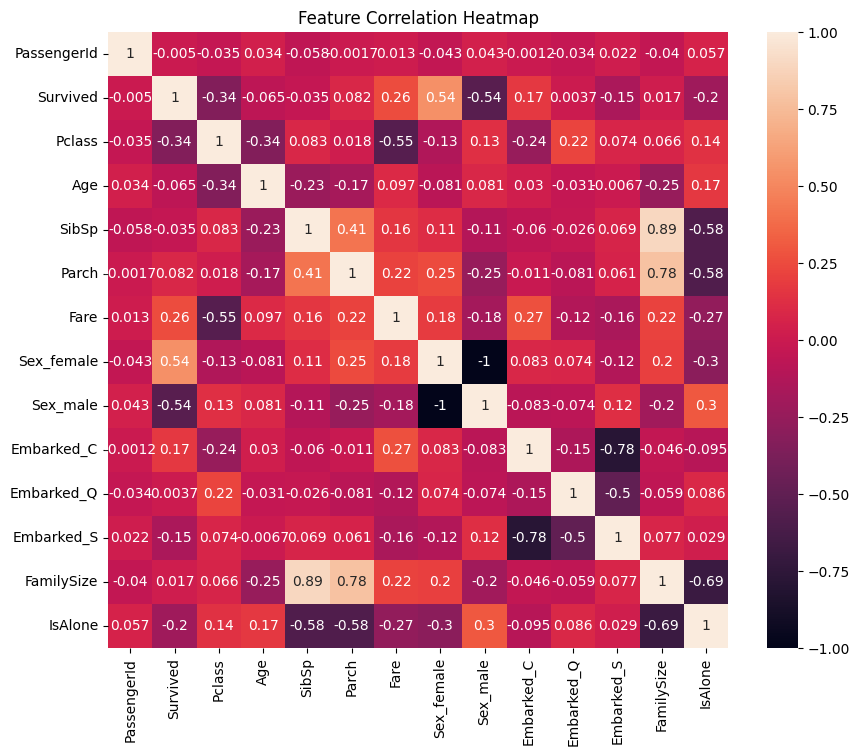

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_cv.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()


### **Observations**

**Correlation with Target Variable (Survived)**
* Sex_female: Shows a strong positive correlation (0.54) with Survived, indicating that females had a significantly higher chance of survival.
* Sex_male: Shows a strong negative correlation (-0.54) with Survived, which suggests that males had a lower chance of survival.
* Pclass: Has a negative correlation (-0.34) with Survived, indicating that passengers in lower classes (3rd class) had a lower survival rate compared to those in higher classes.
* Fare: Shows a positive correlation (0.26) with Survived, suggesting that passengers who paid higher fares had a better chance of survival (likely due to higher-class cabins).
* IsAlone: Displays a slight negative correlation (-0.20) with Survived, implying that passengers traveling alone had a lower chance of survival.